# Project: Wrangling and Analyze Data

IMPORTING LIBRARIES

In [429]:
import numpy as np
import pandas as pd
import json
import snscrape.modules.twitter as sntwitter
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



#set printing options to display all columns and rows
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

C:\Users\user\AppData\Local\Temp/ipykernel_22916/3094802628.py:16: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)  # or 199


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [430]:
twt_arc=pd.read_csv('twitter-archive-enhanced.csv')
twt_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   float64
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [431]:
twt_arc.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,8.924210e+17,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN
1,8.921770e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN
2,8.918150e+17,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,NaN,NaN


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [568]:
import csv
import requests
import os


importing the libraries

In [576]:
# Make directory if it doesn't already exist
folder_name = 'UDACITY PROJECT 2'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

creating folder for storing the tsv file

In [577]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

Using request libraries to assess data from url

In [578]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

writing the tsv file to the folder path 

In [580]:
imgs=pd.read_csv(r'C:\Users\user\Desktop\UDACITY PROJECT 2\UDACITY PROJECT 2\image-predictions.tsv',delimiter='\t')
imgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [433]:
imgs.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twt_arc.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except AttributeError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [434]:
json_df=pd.read_json('jsontweets.Json',lines=True)
#json_df.head(2)
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Quality issues
1.Language column contains language codes that do not exist in the twitter language coding standards

2.There are columns with high amount of incomplete data

3.Empty and null values stored as none should be replaced

4.Time stamp in string format

5.Not sufficient Data in co-ordinates column

6.missing values in in_reply_to_user_id

7.There appeared to be outliers in the rating_numeraator column

8.Outliers in retweet_count column

### Tidiness issues
1.DOGGO,FLOOPER,PUPPER AND PUPPO are all same variable but are divided into 4 columns

2.Rating numerator and denominator can be combined into one column and stored as a decimal unit

3.Multiple types of observational units are stored in the same table in the twitter-archive-enhanced.csv dataset

4.One observational unit spread across the datasets and must be brought into 1 dataset to have uniqueness and the redundant columns dropped.(tweets,url)

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [435]:
# Make copies of original pieces of data
twt_arc2=twt_arc.copy()
imgs2=imgs.copy()
json_df2=json_df.copy()

After making copies of the dataframes, i cleaned the twitter-archive-enhanced.csv in excel by 
1. ADD THE DOGGO,FLOOPER,PUPPER AND PUPPO INTO ONE COLUMN
2. TURN TIME STAMP TO DATE TIME FORMAT AND SPLIT INTO DATE AND TIME AND DELETWD THE TIMESTAMP COLUMN
3. ISOLATE LINK AND RATING FROM TEXT IN TEXT COLUMN
4. DIVIDE RATING NUMERATOR BY RATING DENOMINATOR AND APPEND IT TO A COLUMN CALLED RATING
AFTER DOING THIS I AM IMPORTING IT BACK AS THE ARC DATAFRAME BELOW

In [436]:
arc=pd.read_excel('twitter-archive-enhanced2.xlsx',sheet_name='clean')

In [437]:
arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,date,time,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,stage,rating
0,8.924206e+17,NaN,NaN,2017-08-01,16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,NaN,1.3
1,8.921774e+17,NaN,NaN,2017-08-01,00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 1",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,NaN,1.3
2,8.918152e+17,NaN,NaN,2017-07-31,00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,NaN,1.2
3,8.916896e+17,NaN,NaN,2017-07-30,15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,NaN,1.3
4,8.913276e+17,NaN,NaN,2017-07-29,16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 1",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,NaN,1.2


### Issue #1:Columns with high percentage of null values

#### Define:There are columns with null values accounting for more than 10% of the data and would affect the analysis if not dropped so we define a function to drop codes with less than 90% null values

#### Code

In [438]:
#dropping the selected column list above with the 90% null value query


def rmv(df):

    for column in df.columns.values.tolist():
      missing_values = df[column].isnull().sum()        #total missing values in a column
      total_rows = len(df)                    
      pomv = (missing_values/total_rows)*100            #percentage of missing val in a col
      if pomv>95:
         del(df[column])

    return df

In [439]:
arc=rmv(arc)

In [440]:
arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   float64
 1   date                        2356 non-null   object 
 2   time                        2356 non-null   object 
 3   source                      2356 non-null   object 
 4   text                        2350 non-null   object 
 5   retweeted_status_id         181 non-null    float64
 6   retweeted_status_user_id    181 non-null    float64
 7   retweeted_status_timestamp  181 non-null    object 
 8   expanded_urls               2297 non-null   object 
 9   name                        1611 non-null   object 
 10  stage                       380 non-null    object 
 11  rating                      2355 non-null   float64
dtypes: float64(4), object(8)
memory usage: 221.0+ KB


according to the tidiness standard, i think the arc dataframe has  Multiple types of observational units are stored in the same table.Therefore i will divide the table into 2, 1 containing the tweet_id,date, time, source and text, the other containing name, stage, rating

In [441]:
twt_info={"tweet_id":arc['tweet_id'],
         "date":arc['date'],
         "text":arc['text']}

In [442]:
twt_info=pd.DataFrame(twt_info)

In [443]:
twt_info.head()

,tweet_id,date,text
0,8.924206e+17,2017-08-01,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 1
1,8.921774e+17,2017-08-01,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 1"
2,8.918152e+17,2017-07-31,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 1
3,8.916896e+17,2017-07-30,This is Darla. She commenced a snooze mid meal. 1
4,8.913276e+17,2017-07-29,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 1"


In [444]:
dog_info={"tweet_id":arc['tweet_id'],
          "name":arc['name'],
         "stage":arc['stage'],
         "rating":arc['rating']}

In [445]:
dog_info=pd.DataFrame(dog_info)

In [446]:
dog_info.head()

,tweet_id,name,stage,rating
0,8.924206e+17,Phineas,NaN,1.3
1,8.921774e+17,Tilly,NaN,1.3
2,8.918152e+17,Archie,NaN,1.2
3,8.916896e+17,Darla,NaN,1.3
4,8.913276e+17,Franklin,NaN,1.2


In [447]:
json_df=rmv(json_df)


#### Test

In [448]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   user                           2354 non-null   object             
 10  is_quote_status         

### Issue #2:Some breeds are invalid or where not predicted well in the imgs dataframe

#### Define:Some of the breed where not predicted correctly because of some obstructions in the picture or other factors so we use an external dataset of dog breed to compare and clean out the erroneous breeds

#### Code

IMGS DATAFRAME

In [449]:
imgs.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


IMPORTING THE EXTERNAL DATASET

In [450]:
db = pd.read_csv('https://raw.githubusercontent.com/paiv/fci-breeds/main/fci-breeds.csv')
db.head()

,id,name,group,section,provisional,country,url,image,pdf
0,1,ENGLISH POINTER,Pointing Dogs,British and Irish Pointers and Setters,NaN,GREAT BRITAIN,http://www.fci.be/en/nomenclature/ENGLISH-POINTER-1.html,http://www.fci.be/Nomenclature/Illustrations/001g07.jpg,http://www.fci.be/Nomenclature/Standards/001g07-en.pdf
1,2,ENGLISH SETTER,Pointing Dogs,British and Irish Pointers and Setters,NaN,GREAT BRITAIN,http://www.fci.be/en/nomenclature/ENGLISH-SETTER-2.html,http://www.fci.be/Nomenclature/Illustrations/002g07.jpg,http://www.fci.be/Nomenclature/Standards/002g07-en.pdf
2,3,KERRY BLUE TERRIER,Terriers,Large and medium sized Terriers,NaN,IRELAND,http://www.fci.be/en/nomenclature/KERRY-BLUE-TERRIER-3.html,NaN,http://www.fci.be/Nomenclature/Standards/003g03-en.pdf
3,4,CAIRN TERRIER,Terriers,Small sized Terriers,NaN,GREAT BRITAIN,http://www.fci.be/en/nomenclature/CAIRN-TERRIER-4.html,http://www.fci.be/Nomenclature/Illustrations/004g03.jpg,http://www.fci.be/Nomenclature/Standards/004g03-en.pdf
4,5,ENGLISH COCKER SPANIEL,Retrievers,Flushing Dogs,NaN,GREAT BRITAIN,http://www.fci.be/en/nomenclature/ENGLISH-COCKER-SPANIEL-5.html,http://www.fci.be/Nomenclature/Illustrations/005g08.jpg,http://www.fci.be/Nomenclature/Standards/005g08-en.pdf


In the p1, p2 and p3 columns, the dog names start with capital letters and are seperated by underscore however, in our dog breeds database the dog breeds are in caps and are seperated by space so we will make the p1,p2 and p3 to be in the same format with the dog breeds column in the dog breeds database

In [451]:
#Building a helper function to replace '_' with ' ' and convert all to uppercase

def refr(breed):
    
    breed = breed.replace('_', ' ')
    breed = breed.upper()
    
    return breed

To compare the p1,p2,p3 with the name column of the db dataframe

In [452]:
confd = []

for bn in range (len(imgs)):
    brd = imgs['p1'][bn]
    brd = refr(brd)
    if brd in db['name'].values.tolist():
      confd.append(brd)

    elif  brd in db['name'].values.tolist() == False and refr(imgs['p2'][bn]) in db['name'].values.tolist()==True:
      brd = refr(imgs['p2'][bn])
      confd.append(brd)

    elif brd in db['name'].values.tolist() == False and refr(imgs['p2'][bn]) in db['name'].values.tolist()==False and refr(imgs['p3'][bn]) in db['name'].values.tolist()==True:
      confd.append(refr(imgs['p3'][bn]))
    else:
      brd = 'nan'
      confd.append(brd)

In [453]:
#to check
len(confd), imgs.shape

(2075, (2075, 12))

WE WILL BE REPLACING P1 WITH THE LIST OF CORRECT BREEDS

In [454]:
imgs['p1'] = confd
imgs.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,WELSH SPRINGER SPANIEL,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,nan,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,nan,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,RHODESIAN RIDGEBACK,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,MINIATURE PINSCHER,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [455]:
imgs.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

since we have our accurate breeds in p1, we will be droppind p2&p3 with their confidence intervals

In [456]:
imgs.drop([ 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],axis=1, inplace=True)

#### Test

In [457]:
imgs.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,WELSH SPRINGER SPANIEL,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,nan,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,nan,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,RHODESIAN RIDGEBACK,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,MINIATURE PINSCHER,0.560311,True


JSON DATASET CONTAINING NESTED ENTITIES AND IRRELEVANT COLUMNS


In [458]:
json_df.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source', 'user',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'lang', 'retweeted_status'],
      dtype='object')

we only need the 'id','id_str','retweet_count' and favorite_count from the json dataframe

In [459]:
json_df={"id":json_df['id'],
        "id2":json_df['id_str'],
        "retweet_count":json_df['retweet_count'],
        "likes":json_df['favorite_count']}

In [460]:
json_df=pd.DataFrame(json_df)

In [461]:
json_df.head()

,id,id2,retweet_count,likes
0,892420643555336193,892420643555336192,8853,39467
1,892177421306343426,892177421306343424,6514,33819
2,891815181378084864,891815181378084864,4328,25461
3,891689557279858688,891689557279858688,8964,42908
4,891327558926688256,891327558926688256,9774,41048


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

I will now gather all the dataframes, drop their irrelevant columns and join them into one master dataFrame for analysis. This will help tackle the problem of having one observational unit in different dataframes.

In [462]:
arc.columns

Index(['tweet_id', 'date', 'time', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'name', 'stage', 'rating'],
      dtype='object')

In [463]:
arc.head(3)

,tweet_id,date,time,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,stage,rating
0,8.924206e+17,2017-08-01,16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,NaN,1.3
1,8.921774e+17,2017-08-01,00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 1",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,NaN,1.3
2,8.918152e+17,2017-07-31,00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,NaN,1.2


In [464]:
imgs.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog'], dtype='object')

In [465]:
imgs.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,WELSH SPRINGER SPANIEL,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,nan,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,nan,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,RHODESIAN RIDGEBACK,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,MINIATURE PINSCHER,0.560311,True


In [466]:
json_df.columns

Index(['id', 'id2', 'retweet_count', 'likes'], dtype='object')

In [467]:
json_df.head()

,id,id2,retweet_count,likes
0,892420643555336193,892420643555336192,8853,39467
1,892177421306343426,892177421306343424,6514,33819
2,891815181378084864,891815181378084864,4328,25461
3,891689557279858688,891689557279858688,8964,42908
4,891327558926688256,891327558926688256,9774,41048


Merging the dataframes

In [468]:
master=arc.join(imgs, how='left', lsuffix=' ', rsuffix=' ', sort=False)

In [469]:
master.head()

,tweet_id,date,time,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,stage,rating,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,8.924206e+17,2017-08-01,16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,NaN,1.3,6.660209e+17,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,WELSH SPRINGER SPANIEL,0.465074,True
1,8.921774e+17,2017-08-01,00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 1",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,NaN,1.3,6.660293e+17,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,nan,0.506826,True
2,8.918152e+17,2017-07-31,00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,NaN,1.2,6.660334e+17,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,nan,0.596461,True
3,8.916896e+17,2017-07-30,15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,NaN,1.3,6.660442e+17,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,RHODESIAN RIDGEBACK,0.408143,True
4,8.913276e+17,2017-07-29,16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 1",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,NaN,1.2,6.660492e+17,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,MINIATURE PINSCHER,0.560311,True


In [470]:
#json_df.info()

In [471]:
master_df=master.join(json_df, how='left', lsuffix=' ', rsuffix=' ', sort=False)

In [472]:
master_df.head(3)

,tweet_id,date,time,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,stage,rating,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,id,id2,retweet_count,likes
0,8.924206e+17,2017-08-01,16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,NaN,1.3,6.660209e+17,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,WELSH SPRINGER SPANIEL,0.465074,True,8.924206e+17,8.924206e+17,8853.0,39467.0
1,8.921774e+17,2017-08-01,00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 1",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,NaN,1.3,6.660293e+17,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,nan,0.506826,True,8.921774e+17,8.921774e+17,6514.0,33819.0
2,8.918152e+17,2017-07-31,00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,NaN,1.2,6.660334e+17,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,nan,0.596461,True,8.918152e+17,8.918152e+17,4328.0,25461.0


In [473]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   float64
 1   date                        2356 non-null   object 
 2   time                        2356 non-null   object 
 3   source                      2356 non-null   object 
 4   text                        2350 non-null   object 
 5   retweeted_status_id         181 non-null    float64
 6   retweeted_status_user_id    181 non-null    float64
 7   retweeted_status_timestamp  181 non-null    object 
 8   expanded_urls               2297 non-null   object 
 9   name                        1611 non-null   object 
 10  stage                       380 non-null    object 
 11  rating                      2355 non-null   float64
 12  tweet_id                    2075 non-null   float64
 13  jpg_url                     2075 

There are still some irrelevant columns in the master df that i have to drop to make it complete and tidy

In [474]:
master_df.columns

Index(['tweet_id ', 'date', 'time', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'name', 'stage', 'rating', 'tweet_id ', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'id', 'id2', 'retweet_count',
       'likes'],
      dtype='object')

In [475]:
master_df.drop(['retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'tweet_id ', 'jpg_url',
       'img_num'],axis=1,inplace=True)

In [476]:
master_df3=master_df2.to_csv(r'C:\Users\user\Desktop\UDACITY PROJECT 2\twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

Dog Stage count

In [482]:
stage=master_df.groupby('stage')

In [484]:
stage=stage.count()

In [485]:
stage=pd.DataFrame(stage)

In [504]:
stage.sort_values('id',ascending=False)

,date,time,source,text,name,rating,p1,p1_conf,p1_dog,id,id2,retweet_count,likes
stage,,,,,,,,,,,,,
pupper,245,245,245,245,142,245,245,245,245,245,245,245,245
doggo,83,83,83,83,47,83,83,83,83,83,83,83,83
puppo,29,29,29,29,20,29,29,29,29,29,29,29,29
doggopupper,12,12,12,12,6,12,12,12,12,12,12,12,12
floofer,9,9,9,9,5,9,9,9,9,9,9,9,9
doggofloofer,1,1,1,1,0,1,1,1,1,1,1,1,1
doggopuppo,1,1,1,1,0,1,1,1,1,1,1,1,1


We can see pupper is the stage with the most dogs 

To find the most retweeteddog post

In [383]:
hr=master_df['retweet_count'].max()

In [384]:
master_df[master_df['retweet_count']==hr]

,date,time,source,text,name,stage,rating,p1,p1_conf,p1_dog,id,id2,retweet_count,likes
1037,2016-06-20,01:54:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Harvey. He's stealthy af. 1,Harvey,NaN,1.0,nan,0.105171,False,7.442348e+17,7.442348e+17,79515.0,131075.0


most favorite dog

In [386]:
hf=master_df['likes'].max()

In [387]:
master_df[master_df['likes']==hf]

,date,time,source,text,name,stage,rating,p1,p1_conf,p1_dog,id,id2,retweet_count,likes
412,2017-01-22,01:12:59,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Albus. He's soaked as h*ck. Seems to have misplaced an ear as well. Still in good spirits tho. 1,Albus,NaN,1.2,nan,0.172079,False,8.228729e+17,8.228729e+17,48265.0,132810.0


albus from 2017 has the highest favorite count

most popular breeds

In [388]:
master_df['p1'].value_counts(dropna=True).sort_values(ascending=False)

nan                               1229
GOLDEN RETRIEVER                  150 
LABRADOR RETRIEVER                100 
CHIHUAHUA                         83  
PUG                               57  
SAMOYED                           43  
FRENCH BULLDOG                    26  
MINIATURE PINSCHER                23  
CHESAPEAKE BAY RETRIEVER          23  
SIBERIAN HUSKY                    20  
BEAGLE                            18  
SHETLAND SHEEPDOG                 18  
ROTTWEILER                        17  
LAKELAND TERRIER                  17  
KUVASZ                            16  
WEST HIGHLAND WHITE TERRIER       14  
DALMATIAN                         13  
AMERICAN STAFFORDSHIRE TERRIER    13  
BORDER COLLIE                     12  
OLD ENGLISH SHEEPDOG              12  
BERNESE MOUNTAIN DOG              10  
BOXER                             10  
SCHIPPERKE                        10  
WHIPPET                           9   
GREAT DANE                        9   
YORKSHIRE TERRIER        

In [478]:
breed=master_df.groupby('p1')

In [479]:
breed=breed.sum().sort_values('likes',ascending=False).drop('nan',axis=0)

In [480]:
breed=pd.DataFrame(breed)

In [481]:
breed

,rating,p1_conf,id,id2,retweet_count,likes
p1,,,,,,
GOLDEN RETRIEVER,159.478571,108.533285,1.095235e+20,1.095235e+20,366962.0,1008182.0
LABRADOR RETRIEVER,115.900000,66.652336,7.391084e+19,7.391084e+19,308581.0,911072.0
CHIHUAHUA,92.300000,48.711727,6.371069e+19,6.371069e+19,323065.0,752399.0
PUG,62.518182,43.186819,4.370211e+19,4.370211e+19,167101.0,399731.0
SAMOYED,47.400000,31.864562,3.148184e+19,3.148184e+19,181688.0,300092.0
BEAGLE,20.400000,10.369169,1.383755e+19,1.383755e+19,99652.0,249859.0
ROTTWEILER,18.800000,9.703581,1.318733e+19,1.318733e+19,62007.0,224327.0
MINIATURE PINSCHER,24.600000,11.856065,1.733614e+19,1.733614e+19,81392.0,209330.0
CHESAPEAKE BAY RETRIEVER,26.600000,12.514626,1.717868e+19,1.717868e+19,116116.0,197886.0


In [425]:
breed2=breed.head()

In [427]:
breed2.head()

,rating,p1_conf,id,id2,retweet_count,likes
p1,,,,,,
GOLDEN RETRIEVER,159.478571,108.533285,1.095235e+20,1.095235e+20,366962.0,1008182.0
LABRADOR RETRIEVER,115.900000,66.652336,7.391084e+19,7.391084e+19,308581.0,911072.0
CHIHUAHUA,92.300000,48.711727,6.371069e+19,6.371069e+19,323065.0,752399.0
PUG,62.518182,43.186819,4.370211e+19,4.370211e+19,167101.0,399731.0
SAMOYED,47.400000,31.864562,3.148184e+19,3.148184e+19,181688.0,300092.0


We can see that The golden retriever is the most popular breed and the Australian terrier and sussex spaniel are the least posted

In [493]:
master_df.rename(columns={"p1":"breeds"},inplace=True)

Therefore Harvey's post from 2018 has the highest retweets

### Insights:
1.Therefore Harvey's post from 2018 has the highest retweets


2.Albus from 2017 has the highest favorite count

3.We can see that The golden retriever is the most popular breed and the Australian terrier and sussex spaniel are the least posted

4.We can see pupper is the stage with the most dogs 

### Visualization

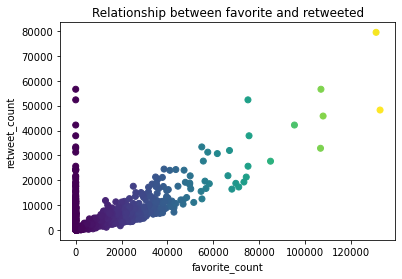

In [256]:
plt.scatter(x='favorite_count',y='retweet_count',c='favorite_count',data=master_df2)
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')
plt.title('Relationship between favorite and retweeted')
plt.savefig('Relationship between favorite and retweeted.png')

Its obvious that there is a relationship between the retweeted count and favorite count so we can conclude that when people retweet a dog post, they find it appealing and may consider the dog as special.

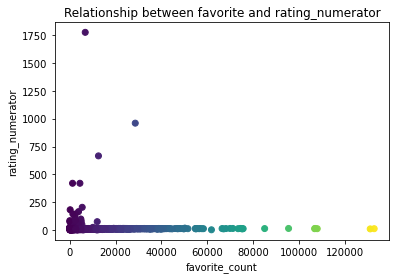

In [317]:
plt.scatter(x='favorite_count',y='rating_numerator',c='favorite_count',data=master_df2)
plt.xlabel('favorite_count')
plt.ylabel('rating_numerator')
plt.title('Relationship between favorite and rating_numerator')
plt.savefig('Relationship between favorite and rating_numerator.png')

There is little or no relationship between the favorite count and the rating numerato as seen in the above diagram

In [230]:
master_cor=master_df2.corr()

In [231]:
master_cor

,tweet_id_twt_arc2,rating_numerator,rating_denominator,retweet_count,favorite_count
tweet_id_twt_arc2,1.000000,0.049496,-0.028273,0.390154,0.528301
rating_numerator,0.049496,1.000000,0.150388,0.003561,0.019495
rating_denominator,-0.028273,0.150388,1.000000,-0.024046,-0.028657
retweet_count,0.390154,0.003561,-0.024046,1.000000,0.702881
favorite_count,0.528301,0.019495,-0.028657,0.702881,1.000000


Heatmap

Text(32.09374999999999, 0.5, 'coloumns')

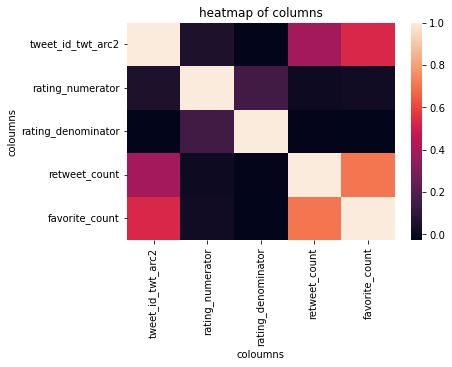

In [232]:
ax = plt.axes()
sns.heatmap(master_cor, ax = ax)
ax.set_title('heatmap of columns')
ax.set_xlabel('coloumns')
ax.set_ylabel('coloumns')

we can now see the correlation between the favorite_count and the retweet count is the highest so they influence each other

Now a plot to demonstrate the top 5 breeds

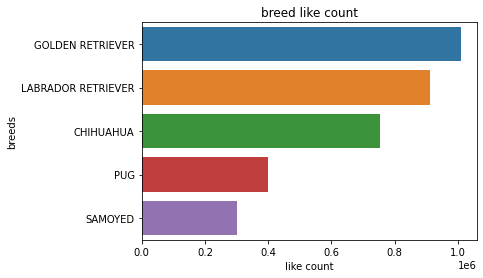

In [507]:
ax = plt.axes()
sns.barplot(y=breed2.index,x='likes',data=breed2)
ax.set_title('breed like count')
ax.set_xlabel('like count')
ax.set_ylabel('breeds')
plt.savefig('breed likes.png')

These are the top most liked breeds and The golden retriever from all indications is the most loved Dog as it has the highest like and retweet count

In [422]:
breed_cor=breed.corr()

Text(32.09375, 0.5, 'coloumns')

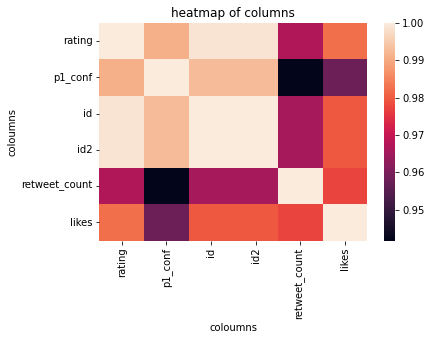

In [423]:
ax = plt.axes()
sns.heatmap(breed_cor, ax = ax)
ax.set_title('heatmap of columns')
ax.set_xlabel('coloumns')
ax.set_ylabel('coloumns')

From this heatmap we can find a correlation between rating and likes

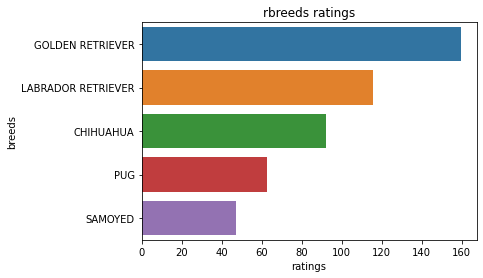

In [508]:
ax = plt.axes()
sns.barplot(y=breed2.index,x='rating',data=breed2)
ax.set_title('rbreeds ratings')
ax.set_xlabel('ratings')
ax.set_ylabel('breeds')
plt.savefig('breed ratings.png')

Golden retriever with highest rating

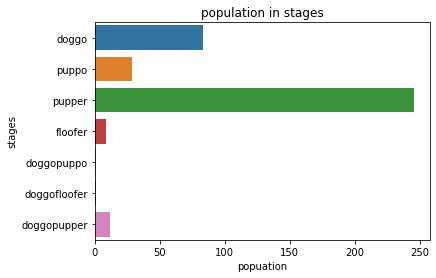

In [510]:
ax = plt.axes()
sns.countplot(y='stage',data=master_df)
ax.set_title('population in stages')
ax.set_xlabel('popuation')
ax.set_ylabel('stages')
plt.savefig('stages.png')

pupper has the highest population of dogs